In [1]:
# Virtualenv configuration and installation 
## source env/bin/activate
## pip install jupyter
## pip install matplotlib
## pip install OpenBlender

In [2]:
import OpenBlender
import pandas as pd
import json
import matplotlib.pyplot as plt
import time

In [3]:
action = 'API_getObservationsFromDataset'
#Parameters to BMV    
parameters = { 
    	'token':'WMQ2YH5AaOtXcTQgv8rgSLanz3hQ3i',
	'id_user':'5d1645a45f361d089d9bd5e0',
	'id_dataset':'5d126efa951629360e921fad',
	'date_treatment':'breakdown',
	'categorical_treatment':'convert_to_numeric' 
}
        
response = OpenBlender.call(action, parameters)
df = pd.read_json(json.dumps(response['sample']), convert_dates=False, convert_axes=False)
df.head()

Setting up..
starting process..
16.67 % completed.
downloading..
33.33 % completed.
downloading..
50.0 % completed.
downloading..
66.67 % completed.
downloading..
83.33 % completed.
downloading..
100.0 % completed.
wrapping up..


,index,change,high,low,open,price,timestamp,volume,ts_hour,ts_month_january,...,ts_month_december,ts_month_other,TS_DAY_OF_.monday,TS_DAY_OF_.tuesday,TS_DAY_OF_.wednesday,TS_DAY_OF_.thursday,TS_DAY_OF_.friday,TS_DAY_OF_.saturday,TS_DAY_OF_.sunday,TS_DAY_OF_.other
0,0,-0.70%,49193.05,48574.25,48881.68,48745.28,1524153600,192.59M,16,0,...,0,0,0,0,0,1,0,0,0,0
1,1,-0.64%,48958.39,48209.54,48815.33,48431.58,1524240000,149.94M,16,0,...,0,0,0,0,0,0,1,0,0,0
10,107,0.48%,43086.74,42704.83,42753.48,42958.82,1388419200,175.83M,16,0,...,1,0,1,0,0,0,0,0,0,0
100,189,1.38%,50083.02,49328.60,49376.26,50033.95,1514908800,106.59M,16,1,...,0,0,0,1,0,0,0,0,0,0
1000,189,-1.39%,46731.90,46027.10,46721.70,46071.57,1483718400,207.60M,16,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# Paremeters to cemex
parameters_cemex = { 
    	'token':'WMQ2YH5AaOtXcTQgv8rgSLanz3hQ3i',
	'id_user':'5d1645a45f361d089d9bd5e0',
	'id_dataset':'5d1273cd951629360f7cd64f',
	'date_treatment':'breakdown',
	'categorical_treatment':'convert_to_numeric',
	'only_return_numbers':1 
}
        
response_cemex = OpenBlender.call(action, parameters_cemex)
df_cemex = pd.read_json(json.dumps(response_cemex['sample']), convert_dates=False, convert_axes=False)
df_cemex.head()

Setting up..
starting process..
16.67 % completed.
downloading..
33.33 % completed.
downloading..
50.0 % completed.
downloading..
66.67 % completed.
downloading..
83.33 % completed.
downloading..
100.0 % completed.
wrapping up..


,index,change,high,low,open,price,timestamp,volume,ts_hour,ts_month_january,...,ts_month_december,ts_month_other,TS_DAY_OF_.monday,TS_DAY_OF_.tuesday,TS_DAY_OF_.wednesday,TS_DAY_OF_.thursday,TS_DAY_OF_.friday,TS_DAY_OF_.saturday,TS_DAY_OF_.sunday,TS_DAY_OF_.other
0,0,1.53,13.150,12.730,12.960,12.850,1524153600,29.54,16,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1.25,12.980,12.670,12.820,12.690,1524240000,22.30,16,0,...,0,0,0,0,0,0,1,0,0,0
10,107,0.13,14.229,14.081,14.118,14.173,1388419200,18.50,16,0,...,1,0,1,0,0,0,0,0,0,0
100,189,2.52,15.130,14.610,14.770,15.070,1514908800,19.88,16,1,...,0,0,0,1,0,0,0,0,0,0
1000,189,0.55,12.056,11.612,11.612,11.779,1441296000,43.96,16,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
list_bmv= list(df)

In [6]:
ts_month_mean_low = []
ts_month_mean_high = []
for x in list_bmv:
    if 'month' in x:
        suffix_docs = x.split('_')[len(x.split('_')) - 1]
        if suffix_docs != 'other':
            ts_month_mean_low.append({"month":suffix_docs,"mean":df.loc[df[x] == 1, 'low'].mean()})
            ts_month_mean_high.append({"month":suffix_docs,"mean":df.loc[df[x] == 1, 'high'].mean()})


In [7]:
order_low = sorted(ts_month_mean_low, key = lambda month: month['mean'])
order_high = sorted(ts_month_mean_high, key = lambda month: month['mean'])


In [8]:
# The three months with lowest price
months_low = order_low[-3:]
print("The months with  the lowest price")
print("-------------------------------------")
for x in months_low:
    print("The month: ",x['month'],"with",x['mean'])

The months with  the lowest price
-------------------------------------
The month:  july with 45541.617744360905
The month:  september with 45800.281935483865
The month:  august with 46211.66578947369


In [9]:
# The three months with high price

months_high = order_high [-3:]
print("The months with the highest price")
print("-------------------------------------")
for x in months_high:
    print("The month: ",x['month'],"with",x['mean'])

The months with the highest price
-------------------------------------
The month:  july with 46019.757894736846
The month:  september with 46309.63266129033
The month:  august with 46720.42616541353


In [10]:
array_weeks = []
ts_month_february = {}
ts_month_june = {}
ts_month_december = {}
for x in list_bmv:
    if 'TS_DAY_OF' in x:
        suffix_docs = x.split('_')[len(x.split('_')) - 1].strip('.')
        if suffix_docs != 'other':
            ts_month_february.update({suffix_docs:df.loc[(df['ts_month_february'] == 1) & (df[x] == 1), 'price'].mean()})
            ts_month_june.update({suffix_docs:df.loc[(df['ts_month_june'] == 1) & (df[x] == 1), 'price'].mean()})
            ts_month_december.update({suffix_docs:df.loc[(df['ts_month_december'] == 1) & (df[x] == 1), 'price'].mean()})
array_weeks.append(ts_month_february)
array_weeks.append(ts_month_june)
array_weeks.append(ts_month_december)

            

In [11]:
df_ =pd.DataFrame(array_weeks)
df_.rename(index={0:'february',1:'june',2:'december'}, inplace=True)

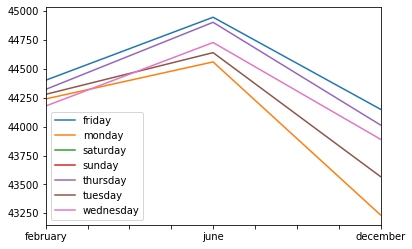

In [12]:
df_.plot()

In [13]:
df = df.sort_values('timestamp', ascending=True)
df_cemex = df_cemex.sort_values('timestamp', ascending=True)

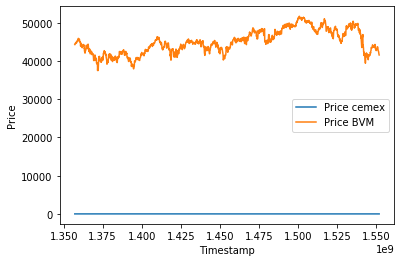

In [14]:
# Plot two dataframes
#In this case, the graph show with a big differece becasuse the prices vary a lot
a= plt.plot(df_cemex['timestamp'],df_cemex['price'])
b = plt.plot(df['timestamp'],df['price'])
plt.ylabel('Price')
plt.xlabel('Timestamp')

plt.legend((a[0], b[0]), ('Price cemex', 'Price BVM'))


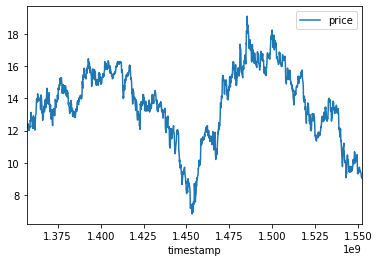

In [15]:
# Show only cemex graph
df_cemex.plot('timestamp','price')

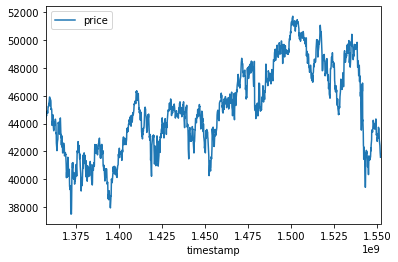

In [16]:
# Show only BVM graph

df.plot('timestamp','price')

In [17]:
df['uplift'] = df['price'].pct_change().fillna(0)
df_cemex['uplift'] = df_cemex['price'].pct_change().fillna(0)

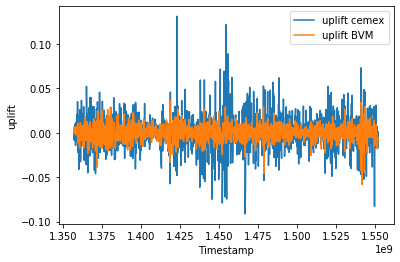

In [18]:
# Plot two dataframes
#In this case, the graph show with a big differece becasuse the prices bary a lot
a= plt.plot(df_cemex['timestamp'],df_cemex['uplift'])
b = plt.plot(df['timestamp'],df['uplift'])
plt.ylabel('uplift')
plt.xlabel('Timestamp')

plt.legend((a[0], b[0]), ('uplift cemex', 'uplift BVM'))

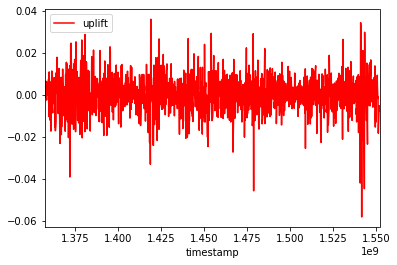

In [19]:
df.plot('timestamp','uplift',color='r')

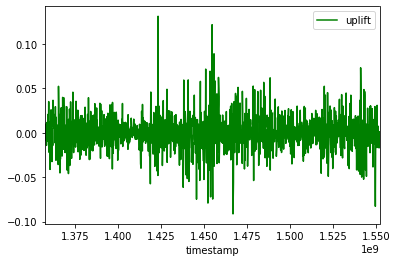

In [20]:
df_cemex.plot('timestamp','uplift',color='g')

In [21]:
#List comprehension
    # Es una manera más sencilla para obtener información de un set de datos además de poder utlizarlo 
    # con condiciones, con una sintaxis más sencilla, además el procesamiento de la información es más rápido
    # a comparación de los loops normales
    # Exemplo
    # Tengo la lista de los precios del dataframe de BMV y solo quiero obtner los precios mayores a 40085.52 
    # Este tipo de lista se utilizan más cuando se la cantidad de la información es demasiado grande Y es 
    # necesario optizar las consultas o validaciones

list_bmv= list(df['price'])
# List comprehension
list_price = [x for x in df.index if df['price'][x] > 40085.52]


#NOT list comprehension
list_2 = []
for x in df.index:
    if df['price'][x] > 40085.52:
        list_2.append(x)


